<H2> Yash Pragnesh Gandhi <br><br> Github id: yash4gandhi <br><br> USC ID: 1150578261

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
col_name = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle","sacral slope",
            "pelvic radius", "grade of spondylolisthesis","class"]

<h3> 1 a Read vertebral_column_data

In [3]:
df = pd.read_csv("../data/vertebral_column_data/column_2C.dat",names = col_name, header = None, sep = ' ')
df.head(3)

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB


In [4]:
df["class"].replace({"AB": 1, "NO": 0}, inplace=True)
df.head(3)

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1


<h3>1 b i. Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

Text(0.5, 1, 'Scatter Plot of each Independent Variable')

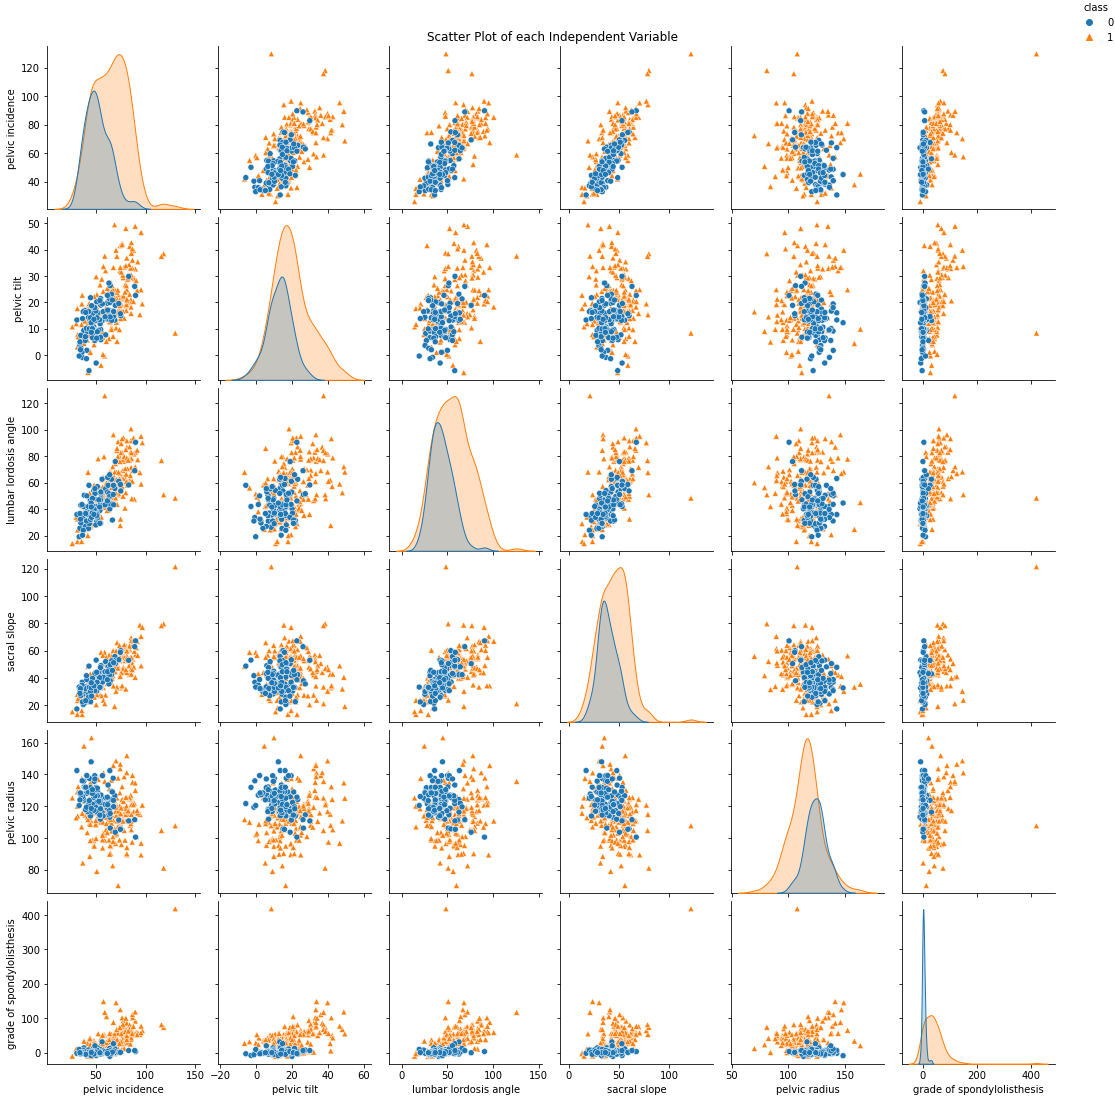

In [5]:
scatter_plot = sns.pairplot(df,hue='class',markers = ["o","^"])
scatter_plot._legend.set_bbox_to_anchor((1, 1))
scatter_plot.fig.suptitle('Scatter Plot of each Independent Variable',y=1)

<h3> 1 b ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 

Text(0.5, 1.0, 'Box plot of pelvic incidence')

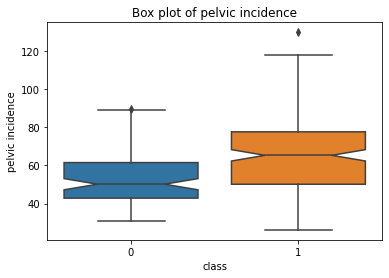

In [6]:
sns.boxplot( x=df["class"], y=df["pelvic incidence"], notch=True).set_title('Box plot of pelvic incidence')

Text(0.5, 1.0, 'Box plot of pelvic tilt')

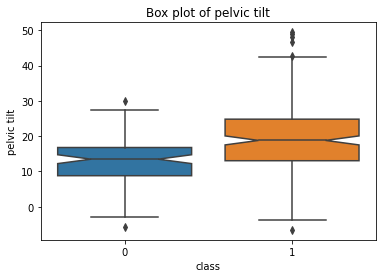

In [7]:
sns.boxplot( x=df["class"], y=df["pelvic tilt"], notch=True).set_title('Box plot of pelvic tilt')

Text(0.5, 1.0, 'Box plot of lumbar lordosis angle')

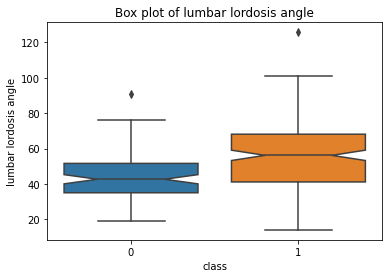

In [8]:
sns.boxplot( x=df["class"], y=df["lumbar lordosis angle"], notch=True).set_title('Box plot of lumbar lordosis angle')

Text(0.5, 1.0, 'Box plot of sacral slope')

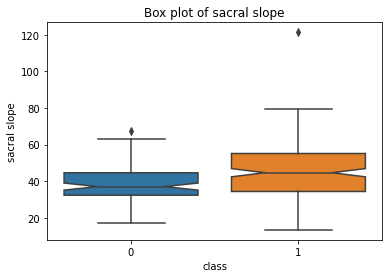

In [9]:
sns.boxplot( x=df["class"], y=df["sacral slope"], notch=True).set_title('Box plot of sacral slope')

Text(0.5, 1.0, 'Box plot of pelvic radius')

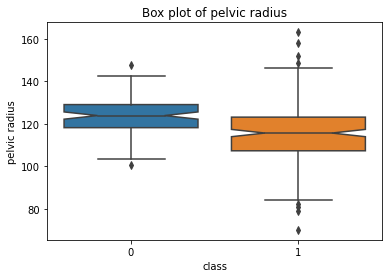

In [10]:
sns.boxplot( x=df["class"], y=df["pelvic radius"], notch=True).set_title('Box plot of pelvic radius')

Text(0.5, 1.0, 'Box plot of grade of spondylolisthesis')

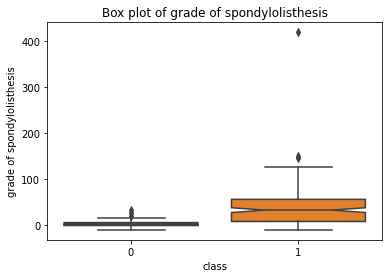

In [11]:
sns.boxplot( x=df["class"], y=df["grade of spondylolisthesis"], notch=True).set_title('Box plot of grade of spondylolisthesis')

<h3> 1 b iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.


In [12]:
new_AB = df[df['class'] == 1]
trainAB = new_AB[:140]
testAB = new_AB[140:]
new_NO = df[df['class'] == 0]
trainNO = new_NO[:70]
testNO = new_NO[70:]
train = pd.concat([trainAB, trainNO], axis=0)
test = pd.concat([testAB, testNO], axis=0)

In [13]:
#train = df.sample(frac=1).reset_index(drop=True)
#train.head()

In [14]:
train_X = train.drop('class',axis=1)
train_y = train[['class']]
test_X = test.drop('class',axis=1)
test_y = test[['class']]

<h3>1 c ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller
increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,
and F1-score when k = k∗2


<h3> Majority Polling is applied using weights = 'uniform' parameter

In [15]:
training_result = []
training_result.append(['Distance_Metric_Used','Value of K','Best Training Error Rate'])

In [16]:
k_test_dict = {}
k_train_dict = {}

for k in range(208,0,-3):
    knn_model = KNeighborsClassifier(n_neighbors=k, weights = 'uniform',  metric = "euclidean")
    knn_model.fit(train_X,train_y)
    train_pred = knn_model.predict(train_X)
    test_pred = knn_model.predict(test_X)
    k_test_dict[k] = 1-metrics.accuracy_score(test_y, test_pred)
    k_train_dict[k] = 1-metrics.accuracy_score(train_y, train_pred)
    
most_suitable_k = min(k_test_dict, key=k_test_dict.get)
print("Most Suitable k is : ",most_suitable_k)
print("The Test Error Rate for this k is", k_test_dict[most_suitable_k])
training_result.append(['Euclidean metric', most_suitable_k, k_test_dict[most_suitable_k]])

Most Suitable k is :  4
The Test Error Rate for this k is 0.06000000000000005


In [17]:
curve_train = pd.DataFrame(k_train_dict, index= [0]).T
curve_test = pd.DataFrame(k_test_dict, index= [0]).T

In [18]:
curve_train.reset_index(inplace=True)
curve_train = curve_train.rename(columns = {'index':'k', 0:'error'})
curve_test.reset_index(inplace=True)
curve_test = curve_test.rename(columns = {'index':'k', 0:'error'})

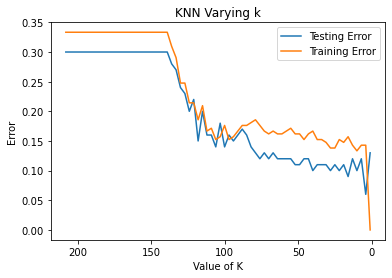

In [19]:
plt.title('KNN Varying k')
plt.plot(curve_test['k'], curve_test['error'], label='Testing Error')
plt.plot(curve_train['k'], curve_train['error'], label='Training Error')
plt.gca().invert_xaxis()
plt.legend()
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.show()

<h3> Confusion Matrix and other metrics:

The confusion Matrix :
[[25  5]
 [ 1 69]]


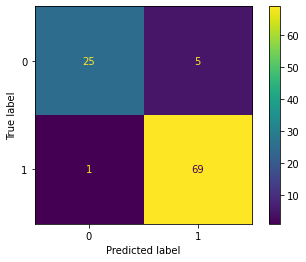

In [20]:
knn_model = KNeighborsClassifier(n_neighbors = most_suitable_k, weights = 'uniform',  metric = "euclidean")
knn_model.fit(train_X,train_y)
test_pred = knn_model.predict(test_X)
confusion_matrix = metrics.confusion_matrix(test_y, test_pred)
print("The confusion Matrix :")
print(confusion_matrix)
metrics.plot_confusion_matrix(knn_model, test_X, test_y)  
plt.show()

In [21]:
true_negative, false_positive, false_negative, true_positive = confusion_matrix.ravel()

In [22]:
truepositiverate = true_positive/(true_positive+false_negative)
print(" True Positive Rate :",truepositiverate)
truenegativerate = true_negative/(true_negative+false_positive)
print(" True Negative Rate :",truenegativerate)
precision = true_positive/(true_positive+false_positive)
print(" Precision :",precision)
recall = truepositiverate
f1 = 2*(precision*recall)/(precision+recall)
print(" F1 Score :",f1)

 True Positive Rate : 0.9857142857142858
 True Negative Rate : 0.8333333333333334
 Precision : 0.9324324324324325
 F1 Score : 0.9583333333333333


<h3> 1 c iii. Since the computation time depends on the size of the training set, one may
only use a subset of the training set. Plot the best test error rate,
3 which
is obtained by some value of k, against the size of training set, when the
size of training set is N ∈ {10, 20, 30, . . . , 210}.
4 Note: for each N, select
your training set by choosing the first bN/3c rows of Class 0 and the first
N − bN/3c rows of Class 1 in the training set you created in 1(b)iii. Also, for
each N, select the optimal k from a set starting from k = 1, increasing by 5.
For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}.
This plot is called a Learning Curve.

In [23]:
dict_for_N_test_error = {}
dict_for_N_k = {}
dict_for_N_train_error = {}

for N in range(10,211,10):
    new_trainNO = new_NO[:N//3]
    new_trainAB = new_AB[:N-N//3]
    new_train = pd.concat([new_trainAB, new_trainNO], axis=0)
    new_train_X = new_train.drop('class',axis=1)
    new_train_y = new_train[['class']]
    dict_for_test_k = {}
    dict_for_train_k = {}
    for k in range(1,N+1,5):
        knn_model = KNeighborsClassifier(n_neighbors=k, weights = 'uniform',  metric = "euclidean")
        knn_model.fit(new_train_X,new_train_y)
        test_pred = knn_model.predict(test_X)
        train_pred = knn_model.predict(train_X)
        dict_for_test_k[k] = 1-metrics.accuracy_score(test_y, test_pred)
        dict_for_train_k[k] = 1 -metrics.accuracy_score(train_y, train_pred)
        
    most_suitable_k = min(dict_for_test_k, key = dict_for_test_k.get)
    dict_for_N_k[N] = most_suitable_k
    dict_for_N_test_error[N] = dict_for_test_k[most_suitable_k]
    dict_for_N_train_error[N] = dict_for_train_k[most_suitable_k]
    
most_suitable_N = min(dict_for_N_test_error, key = dict_for_N_test_error.get)
print("Most Suitable value of N is :",most_suitable_N)
print("Test Error Rate is :",dict_for_N_test_error[most_suitable_N])
print("The optimum value of k for this N is :",dict_for_N_k[most_suitable_N])

training_result.append(['Euclidean metric with N = ' +str(most_suitable_N),dict_for_N_k[most_suitable_N] ,dict_for_N_train_error[most_suitable_N] ])

Most Suitable value of N is : 210
Test Error Rate is : 0.07999999999999996
The optimum value of k for this N is : 6


In [24]:
N_curve = pd.DataFrame(dict_for_N_test_error, index= [0]).T
N_curve.reset_index(inplace=True)
N_curve = N_curve.rename(columns = {'index':'N', 0:'error'})
#N_curve

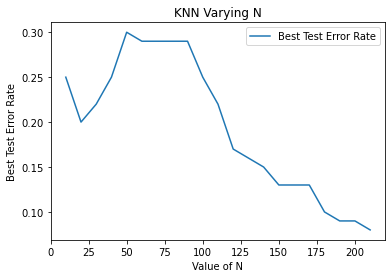

In [25]:
plt.title('KNN Varying N')
plt.plot(N_curve['N'], N_curve['error'], label='Best Test Error Rate')
plt.legend()
plt.xlabel('Value of N')
plt.ylabel('Best Test Error Rate')
plt.show()

<h3> 1 (d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when k = k
*) in a table. Use all of your training data
and select the best k when {1, 6, 11, . . . , 196}.


In [26]:
tabular_result = []
tabular_result.append(['Distance_Metric_Used','Value of K','Best Test Error'])

<h4> Manhattan Distance metric

In [27]:
k_test_dict = {}
k_train_dict = {}

for k in range(1,197,5):
    knn_model = KNeighborsClassifier(n_neighbors=k,  metric = "manhattan", p=1)
    knn_model.fit(train_X,train_y)
    train_pred = knn_model.predict(train_X)
    test_pred = knn_model.predict(test_X)

    k_test_dict[k] = 1-metrics.accuracy_score(test_pred, test_y)
    k_train_dict[k] = 1-metrics.accuracy_score(train_pred, train_y)
    
most_suitable_k_for_manhattan = min(k_test_dict, key=k_test_dict.get)
print("Most Suitable k is : ", most_suitable_k_for_manhattan)
print("The test error rate for this k is", k_test_dict[most_suitable_k_for_manhattan])

tabular_result.append(['Manhattan', most_suitable_k_for_manhattan, k_test_dict[most_suitable_k_for_manhattan]])
training_result.append(['Manhattan', most_suitable_k_for_manhattan, k_test_dict[most_suitable_k_for_manhattan]])

Most Suitable k is :  6
The test error rate for this k is 0.10999999999999999


<h3>Minkowski Distance metric with different p values

In [28]:
p_test_dict = {}
p_train_dict = {}

i = 0.1
while i <= 1:
    knn_model = KNeighborsClassifier(n_neighbors = most_suitable_k_for_manhattan, p= 10**i)
    knn_model.fit(train_X,train_y)
    train_pred = knn_model.predict(train_X)
    test_pred = knn_model.predict(test_X)

    p_test_dict[i] = 1-metrics.accuracy_score(test_y,test_pred)
    p_train_dict[i] = 1-metrics.accuracy_score(train_y, train_pred)
    i+=0.1
    
most_suitable_log_p_for_Minkowski = min(p_test_dict, key=p_test_dict.get)
print("Most Suitable log10(p) is : ",most_suitable_log_p_for_Minkowski)
print("The test error rate for this log10(p) is", p_test_dict[most_suitable_log_p_for_Minkowski])
tabular_result.append(['Minkowski with log10(p) as '+str(most_suitable_log_p_for_Minkowski), most_suitable_k_for_manhattan, p_test_dict[most_suitable_log_p_for_Minkowski]])
training_result.append(['Minkowski with log10(p) as '+str(most_suitable_log_p_for_Minkowski), most_suitable_k_for_manhattan, p_train_dict[most_suitable_log_p_for_Minkowski]])

Most Suitable log10(p) is :  0.6
The test error rate for this log10(p) is 0.06000000000000005


<h3>Chebyshev Distance metric with p = infinity

In [29]:
k_test_dict = {}
k_train_dict = {}

for k in range(1,197,5):
    knn_model = KNeighborsClassifier(n_neighbors=k,  metric = "chebyshev", p=float('inf'))
    knn_model.fit(train_X,train_y)
    train_pred = knn_model.predict(train_X)
    test_pred = knn_model.predict(test_X)

    k_test_dict[k] = 1-metrics.accuracy_score(test_y, test_pred)
    k_train_dict[k] = 1-metrics.accuracy_score(train_y, train_pred)
    
most_suitable_k_for_chebyshev = min(k_test_dict, key = k_test_dict.get)
print("Most Suitable k is : ", most_suitable_k_for_chebyshev)
print("The test error rate for this k is", k_test_dict[most_suitable_k_for_chebyshev])

tabular_result.append(['Chebyshev', most_suitable_k_for_chebyshev, k_test_dict[most_suitable_k_for_chebyshev]])
training_result.append(['Chebyshev', most_suitable_k_for_chebyshev, k_train_dict[most_suitable_k_for_chebyshev]])

Most Suitable k is :  16
The test error rate for this k is 0.07999999999999996


<h3> Mahalanobis Distance metric

In [30]:
k_test_dict = {}
k_train_dict = {}

data = np.cov(train_X)
data = np.linalg.pinv(data)
for k in range(1,197,5):
    knn_model = KNeighborsClassifier(n_neighbors=k,  metric = "mahalanobis",algorithm='brute', metric_params={'V': data})
    knn_model.fit(train_X,train_y)
    train_pred = knn_model.predict(train_X)
    test_pred = knn_model.predict(test_X)

    k_test_dict[k] = 1-metrics.accuracy_score(test_y, test_pred)
    k_train_dict[k] = 1-metrics.accuracy_score(train_y, train_pred)
    
most_suitable_k_for_mahalanobis = min(k_test_dict, key=k_test_dict.get)
print("Most Suitable k is : ",most_suitable_k_for_mahalanobis)
print("The test error rate for this k is", k_test_dict[most_suitable_k_for_mahalanobis])

tabular_result.append(['Mahalanobis', most_suitable_k_for_mahalanobis, k_test_dict[most_suitable_k_for_mahalanobis]])
training_result.append(['Mahalanobis', most_suitable_k_for_mahalanobis, k_train_dict[most_suitable_k_for_mahalanobis]])

Most Suitable k is :  6
The test error rate for this k is 0.16000000000000003


In [31]:
tabular_resultdf = pd.DataFrame(tabular_result[1:],columns=tabular_result[0])
tabular_resultdf

,Distance_Metric_Used,Value of K,Best Test Error
0,Manhattan,6,0.11
1,Minkowski with log10(p) as 0.6,6,0.06
2,Chebyshev,16,0.08
3,Mahalanobis,6,0.16


<h3>1 (e) The majority polling decision can be replaced by weighted decision, in which the
weight of each point in voting is inversely proportional to its distance from the
query/test data point. In this case, closer neighbors of a query point will have
a greater influence than neighbors which are further away. Use weighted voting
with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when k ∈ {1, 6, 11, 16, . . . , 196}.

<h3>Weighted Decision is applied using weights = 'distance' parameter

<h4> Manhattan Distance metric with Weighted Distance

In [32]:
k_test_dict = {}
k_train_dict = {}

for k in range(1,197,5):
    knn_model = KNeighborsClassifier(n_neighbors=k,  metric = "manhattan", p=1, weights = 'distance')
    knn_model.fit(train_X,train_y)
    train_pred = knn_model.predict(train_X)
    test_pred = knn_model.predict(test_X)

    k_test_dict[k] = 1-metrics.accuracy_score(test_y, test_pred)
    k_train_dict[k] = 1-metrics.accuracy_score(train_y, train_pred)
    
most_suitable_k_for_manhattan = min(k_test_dict, key=k_test_dict.get)
print("Most Suitable k is : ",most_suitable_k_for_manhattan)
print("The test error rate for this k is", k_test_dict[most_suitable_k_for_manhattan])

tabular_result.append(['Manhattan with weighted distance', most_suitable_k_for_manhattan, k_test_dict[most_suitable_k_for_manhattan]])
training_result.append(['Manhattan with weighted distance', most_suitable_k_for_manhattan, k_train_dict[most_suitable_k_for_manhattan]])

Most Suitable k is :  26
The test error rate for this k is 0.09999999999999998


<h3>Chebyshev Distance metric with p = infinity with Weighted Distance

In [33]:
k_test_dict = {}
k_train_dict = {}

for k in range(1,197,5):
    knn_model = KNeighborsClassifier(n_neighbors=k,  metric = "chebyshev", p=float('inf'),weights = 'distance')
    knn_model.fit(train_X,train_y)
    train_pred = knn_model.predict(train_X)
    test_pred = knn_model.predict(test_X)

    k_test_dict[k] = 1-metrics.accuracy_score(test_y, test_pred)
    k_train_dict[k] = 1-metrics.accuracy_score(train_y,train_pred)
    
most_suitable_k_for_chebyshev = min(k_test_dict, key=k_test_dict.get)
print("Most Suitable k is : ",most_suitable_k_for_chebyshev)
print("The test error rate for this k is", k_test_dict[most_suitable_k_for_chebyshev])

tabular_result.append(['Chebyshev with weighted distance', most_suitable_k_for_chebyshev, k_test_dict[most_suitable_k_for_chebyshev]])
training_result.append(['Chebyshev with weighted distance', most_suitable_k_for_chebyshev, k_train_dict[most_suitable_k_for_chebyshev]])

Most Suitable k is :  16
The test error rate for this k is 0.10999999999999999


<h3> Mahalanobis metric Distance metric with Weighted Distance

In [34]:
k_test_dict = {}
k_train_dict = {}

data = np.cov(train_X)
data = np.linalg.pinv(data)

for k in range(1,197,5):
    knn_model = KNeighborsClassifier(n_neighbors=k,  metric = "mahalanobis",algorithm='brute', metric_params={'V': data}, weights = 'distance')
    knn_model.fit(train_X,train_y)
    train_pred = knn_model.predict(train_X)
    test_pred = knn_model.predict(test_X)

    k_test_dict[k] = 1-metrics.accuracy_score(test_y, test_pred)
    k_train_dict[k] = 1-metrics.accuracy_score(train_y,train_pred)
    
most_suitable_k_for_mahalanobis = min(k_test_dict, key=k_test_dict.get)
print("Most Suitable k is : ",most_suitable_k_for_mahalanobis)
print("The test error rate for this k is", k_test_dict[most_suitable_k_for_mahalanobis])

tabular_result.append(['Mahalanobis with weighted distance', most_suitable_k_for_mahalanobis, k_test_dict[most_suitable_k_for_mahalanobis]])
training_result.append(['Mahalanobis with weighted distance', most_suitable_k_for_mahalanobis, k_train_dict[most_suitable_k_for_mahalanobis]])

Most Suitable k is :  11
The test error rate for this k is 0.17000000000000004


In [35]:
tabular_resultdf = pd.DataFrame(tabular_result[1:],columns=tabular_result[0])
tabular_resultdf

,Distance_Metric_Used,Value of K,Best Test Error
0,Manhattan,6,0.11
1,Minkowski with log10(p) as 0.6,6,0.06
2,Chebyshev,16,0.08
3,Mahalanobis,6,0.16
4,Manhattan with weighted distance,26,0.10
5,Chebyshev with weighted distance,16,0.11
6,Mahalanobis with weighted distance,11,0.17


<h3>1 (f) What is the lowest training error rate you achieved in this homework?


In [36]:
training_resultdf = pd.DataFrame(training_result[1:], columns = training_result[0])
training_resultdf

,Distance_Metric_Used,Value of K,Best Training Error Rate
0,Euclidean metric,4,0.060000
1,Euclidean metric with N = 210,6,0.147619
2,Manhattan,6,0.110000
3,Minkowski with log10(p) as 0.6,6,0.152381
4,Chebyshev,16,0.147619
5,Mahalanobis,6,0.119048
6,Manhattan with weighted distance,26,0.000000
7,Chebyshev with weighted distance,16,0.000000
8,Mahalanobis with weighted distance,11,0.000000


<h3> Based on above table the lowest training error rate achieved is by Manhattan, Chebyshev and Mahalanobis with weighted Distance at 0.0 error rate. Followed by Euclidean metric at 0.06 error rate

<h4> References<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html<br>
    https://seaborn.pydata.org/introduction.html<br>
    https://scikitlearn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix<br>